### TASK 1 : Merge all csv files into one data frame

In [10]:
import pandas as pd
import glob

''' TASK 1 : Merge 12 csv files into one data frame'''
all_months_data = pd.DataFrame()

for file in glob.glob('Sales_Data/*.csv'):
    temp = pd.read_csv(file)
    all_months_data = pd.concat((all_months_data, temp))
    
print(all_months_data.shape)
all_months_data.head()  

all_months_data.to_csv("all_data.csv", index=False)

(186850, 6)


In [24]:
### Read complete Data
all_data = pd.read_csv('all_data.csv')
all_data.tail()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
186845,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001"
186846,259354,iPhone,1,700,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016"
186847,259355,iPhone,1,700,09/23/19 07:39,"220 12th St, San Francisco, CA 94016"
186848,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016"
186849,259357,USB-C Charging Cable,1,11.95,09/30/19 00:18,"250 Meadow St, San Francisco, CA 94016"


### Data Clean Up

In [40]:
## Clean up Data
all_data[all_data.isna().any(axis=1)]
all_data.dropna(inplace=True)

all_data[all_data.isna().any(axis=1)]  # No more NAN values

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month


In [49]:
all_data = all_data[all_data['Order Date'].str[0:2] != "Or"]  # Removes all headers added as rows
all_data["Quantity Ordered"] = pd.to_numeric(all_data["Quantity Ordered"])
all_data["Price Each"] = pd.to_numeric(all_data["Price Each"])




### Task 2 : What was the best month for Sales? How much was earned in that month?

In [50]:
''' TASK 2 : What was the best month for Sales? How much was earned in that month? '''
all_data["Month"] = all_data["Order Date"].str[0:2]
all_data["Month"].astype('int32')  # Now all months are integers

all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",04,23.900000
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",04,99.989998
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",04,600.000000
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",04,11.990000
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",04,11.990000


Text(0.5, 1.0, 'Sales in each Month')

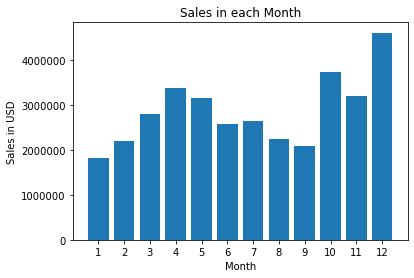

In [67]:
all_data["Sales"] = all_data["Quantity Ordered"].astype('int32') * all_data["Price Each"].astype('float32')
all_data.head()

sales_data = all_data[["Month", "Sales"]]
result = sales_data.groupby("Month").sum()

## Plots
import matplotlib.pyplot as plt
%matplotlib inline

months = range(1, 13)
plt.bar(months, result["Sales"])
plt.xticks(months)
plt.ylabel("Sales in USD")
plt.xlabel("Month")
plt.title("Sales in each Month")

#### Answer : December was the best month for Sales! With '4613443.50' Dollars worth of sales

### TASK 3 : Which city had the highest number of Sales?

[' Atlanta, GA', ' Austin, TX', ' Boston, MA', ' Dallas, TX', ' Los Angeles, CA', ' New York City, NY', ' Portland, ME', ' Portland, OR', ' San Francisco, CA', ' Seattle, WA']
                           Sales
City                            
 Atlanta, GA        2.795498e+06
 Austin, TX         1.819582e+06
 Boston, MA         3.661642e+06
 Dallas, TX         2.767976e+06
 Los Angeles, CA    5.452571e+06
 New York City, NY  4.664318e+06
 Portland, ME       4.497583e+05
 Portland, OR       1.870732e+06
 San Francisco, CA  8.262204e+06
 Seattle, WA        2.747756e+06


([<matplotlib.axis.XTick at 0x17dbc7ae8d0>,
 <a list of 10 Text xticklabel objects>)

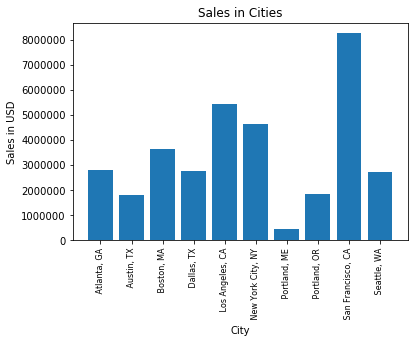

In [112]:
''' Add a City column to the data '''
## Use of APPLY method!!
def get_city(address):
    address = address.split(',')
    state = address[2].split(' ')[1]
    return address[1] + ', ' + state

all_data["City"] = all_data["Purchase Address"].apply(lambda x: get_city(x))
all_data.head()

city_sales = all_data[["Sales", "City"]]
results = city_sales.groupby("City").sum()

# cities = all_data["City"].unique()
# cities = all_data.sort_values(["City"])["City"].unique()
cities = [city for city, df in all_data.groupby("City")]
print(cities)
print(results)

plt.xlabel("City")
plt.ylabel("Sales in USD")
plt.title("Sales in Cities")
plt.bar(cities, results["Sales"])
plt.xticks(cities, rotation='vertical', size=8)

### Answer: San Francisco has the highest sales in that year!